# Project 3 - Detection of the Parkinson’s Disease


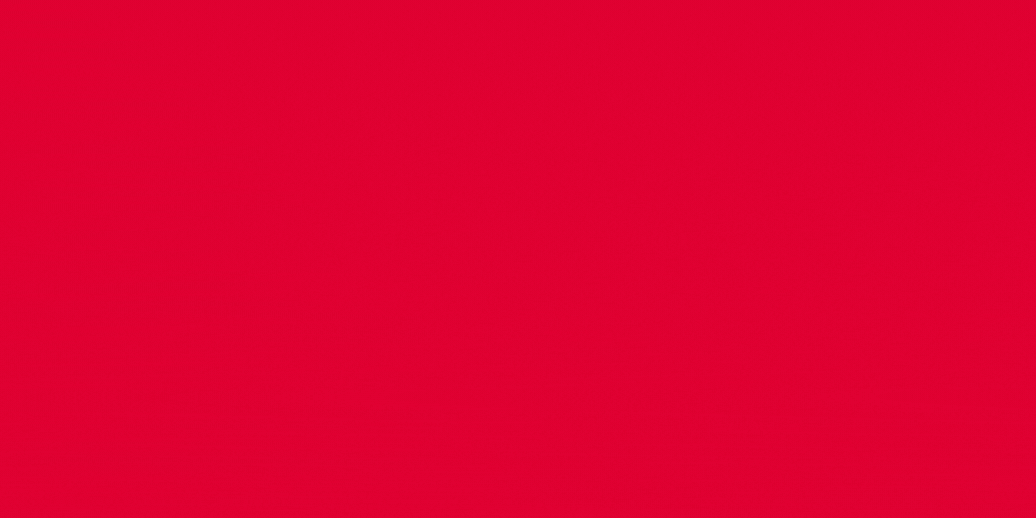

## Business Case :-
**To build a model to accurately detect the presence of Parkinson’s disease in an individual**

## Importing the necessary libraries

In [3]:

import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading  the data 

In [4]:
#Read the data
df=pd.read_csv('pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


**Getting the features and labels from the DataFrame (dataset)**

In [5]:
#Get the features and labels
features=df.loc[:,df.columns!='class'].values[:,1:]
labels=df.loc[:,'class'].values

**The ‘class’ column has values 0 and 1 as labels; let’s get the counts of these labels for both- 0 and 1.**

In [6]:
#DataFlair - Get the count of each label (0 and 1) in labels
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

564 192


**Now we Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them.**

In [7]:
#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

**We split the dataset into training and testing sets**

In [8]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.2, random_state=7)

**Initialize an XGBClassifier and train the model.**

In [9]:
#Train the model
model=XGBClassifier(eval_metric='mlogloss')
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

**Then, we generate y_pred (predicted values for x_test) and calculate the accuracy for the model.Then Print it out.**

In [10]:
#Calculate the accuracy
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100.)

85.52631578947368


In [11]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(

    confusion_matrix(y_test, y_pred),

    columns=['Predicted Healthy', 'Predicted Parkinsons'],

    index=['True Healthy', 'True Parkinsons']

)

,Predicted Healthy,Predicted Parkinsons
True Healthy,24,16
True Parkinsons,6,106
